Статья посвящена созданию системы выявления сердечных заболеваний на основе искусственного интеллекта с использованием алгоритмов машинного обучения. Мы показываем, как машинное обучение может помочь предсказать, разовьются ли у человека сердечные заболевания. В этой статье рассматривается приложение на основе языка python, разработанное для исследований в области здравоохранения, поскольку оно является более надежным и помогает отслеживать и создавать различные типы приложений для мониторинга состояния здоровья. Мы представляем обработку данных, которая включает в себя работу с категориальными переменными и преобразование категориальных столбцов. Мы описываем основные этапы разработки приложения: сбор баз данных, выполнение логистической регрессии и оценка атрибутов набора данных. Разработан алгоритм случайного лесного классификатора для более точной идентификации сердечных заболеваний. Для этого приложения необходим анализ данных, который считается важным, поскольку его точность составляет примерно 83% по сравнению с данными обучения. Затем мы обсудим алгоритм классификации случайных лесов, включая эксперименты и результаты, которые обеспечивают более высокую точность для исследовательских диагнозов. Мы завершаем статью изложением целей, ограничений и результатов исследований.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

In [2]:
ha_df = pd.read_csv('train.csv/train.csv')
ha_df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [3]:
# Display the column names in the dataset
ha_df.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [4]:
# Check data information, data types, and missing values
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [5]:
categoric_cols = ['sex', 'exercise_induced_angina', 'Thal', 'Chest_bin']

In [6]:
for i in categoric_cols:
    if i in ha_df.columns:
        print('All values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', categoric_cols)

All values in column sex : 
sex
0    193532
1    406468
Name: count, dtype: int64


All values in column exercise_induced_angina : 
exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64


Column Thal not found in the DataFrame.
Column Chest_bin not found in the DataFrame.
Categorical columns: ['sex', 'exercise_induced_angina', 'Thal', 'Chest_bin']


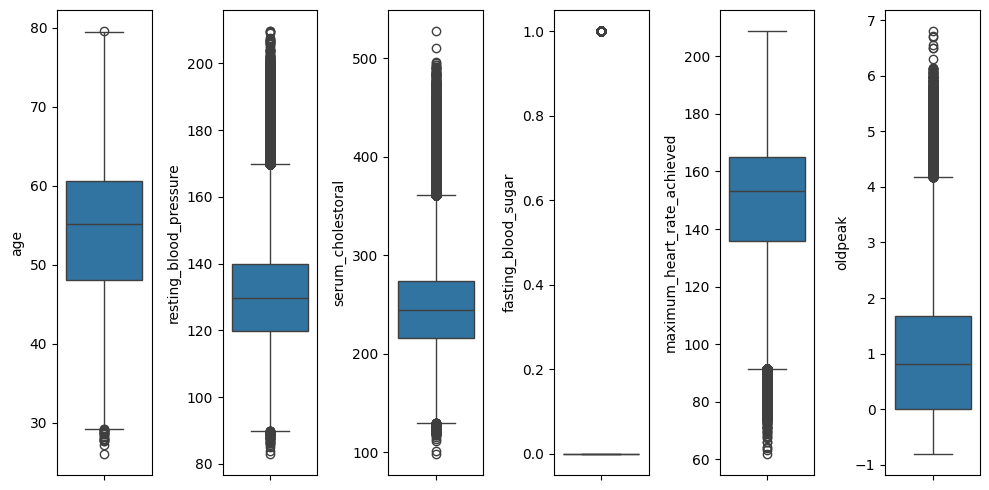

In [7]:
col_num = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'maximum_heart_rate_achieved', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=ha_df[col_num[i]])
    plt.tight_layout()

In [8]:
for i in col_num:
    Q1 = ha_df[i].quantile(0.25)
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

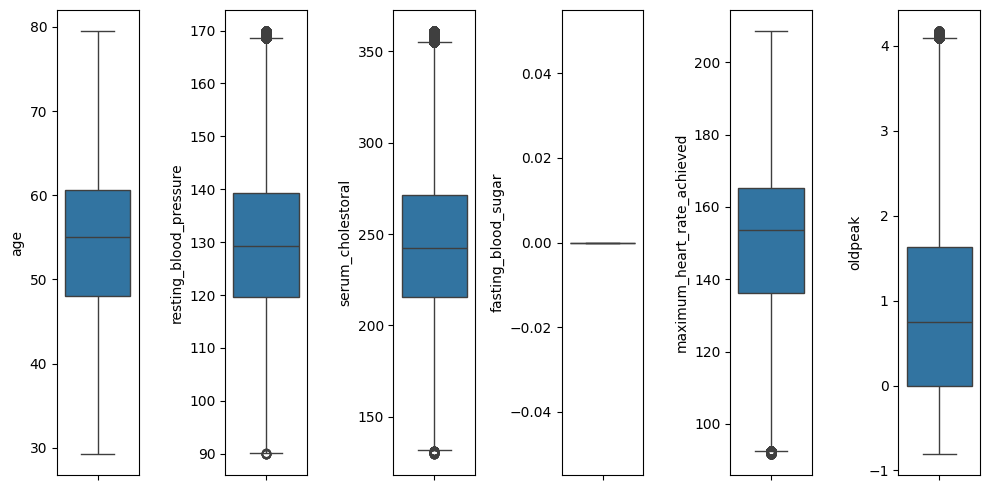

In [9]:
# Check outliers after handling

col_num = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'maximum_heart_rate_achieved', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

In [10]:
ha_df.shape

(461428, 15)

In [11]:
# Missing values
ha_df.isna().sum()

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [12]:
# Duplicate data
ha_df.duplicated().sum()

np.int64(0)

In [13]:
# Remove duplicate rows
ha_df = ha_df.drop_duplicates()

In [14]:
# Check for duplicate data after removal
ha_df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis (EDA)

In [15]:
# Describe statistics for selected numeric columns
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,461428.0,54.352377,9.096069,29.250955,47.985898,55.059773,60.624318,79.504896
resting_blood_pressure,461428.0,129.659292,15.834288,89.937688,119.609699,129.317276,139.215975,169.900393
serum_cholestoral,461428.0,243.821548,44.128174,129.632704,215.377195,242.418627,271.266824,361.139578
fasting_blood_sugar,461428.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
maximum_heart_rate_achieved,461428.0,150.120603,22.613505,91.658774,136.216566,153.506706,165.324199,208.635467
oldpeak,461428.0,0.988422,1.056706,-0.806788,0.000000,0.753891,1.636695,4.174533


In [16]:
df = ha_df

In [17]:
df.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

Count Plot

In [18]:
# Count plot for categorical columns
count = ['sex', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'maximum_heart_rate_achieved', 'oldpeak']

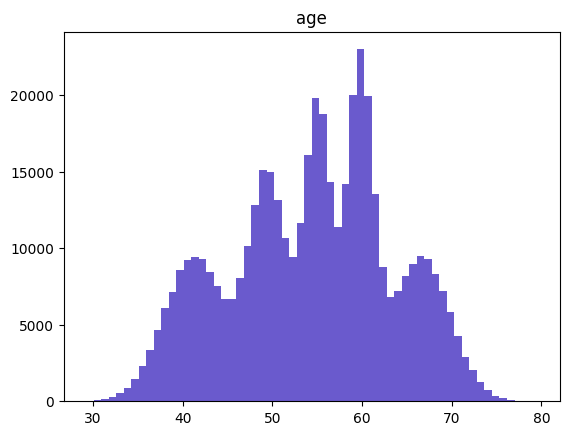

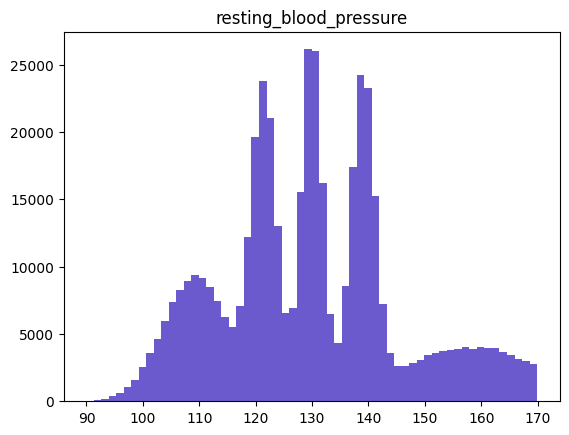

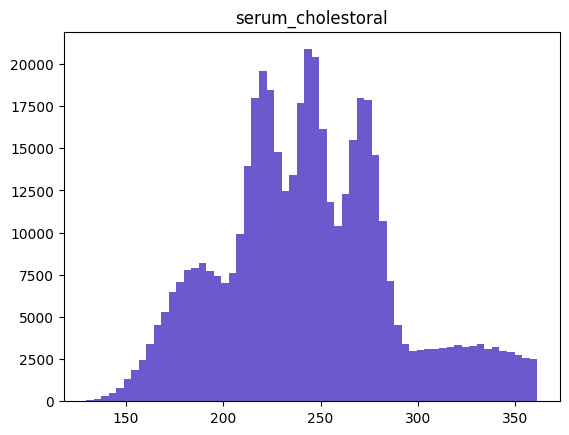

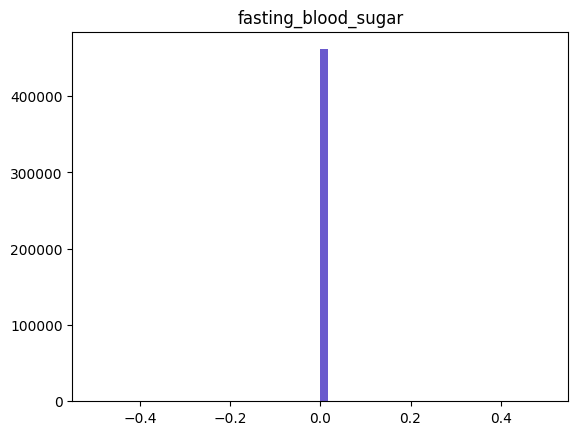

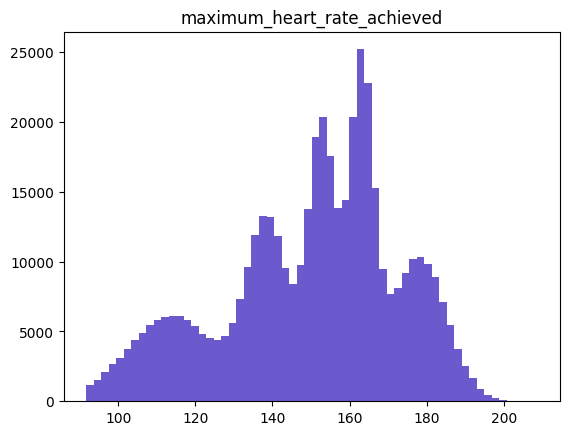

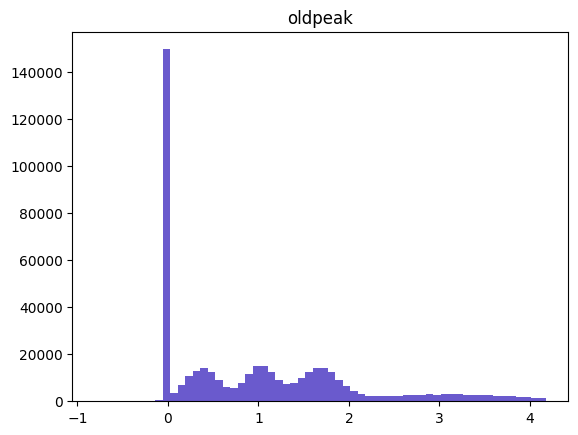

In [19]:
i = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'maximum_heart_rate_achieved', 'oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

Checking for Multicollinearity and Feature Selection

In [20]:
! pip install statsmodels

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [21]:
# Import variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)

# Sort and Display the output
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
4,resting_blood_pressure,50.103118
8,maximum_heart_rate_achieved,36.058891
1,age,30.272798
5,serum_cholestoral,28.129306
3,chest,14.597129
11,slope,10.138409
13,thal,10.031332
14,class,4.194622
0,ID,3.949241
2,sex,3.637499


Pearson Correlation,


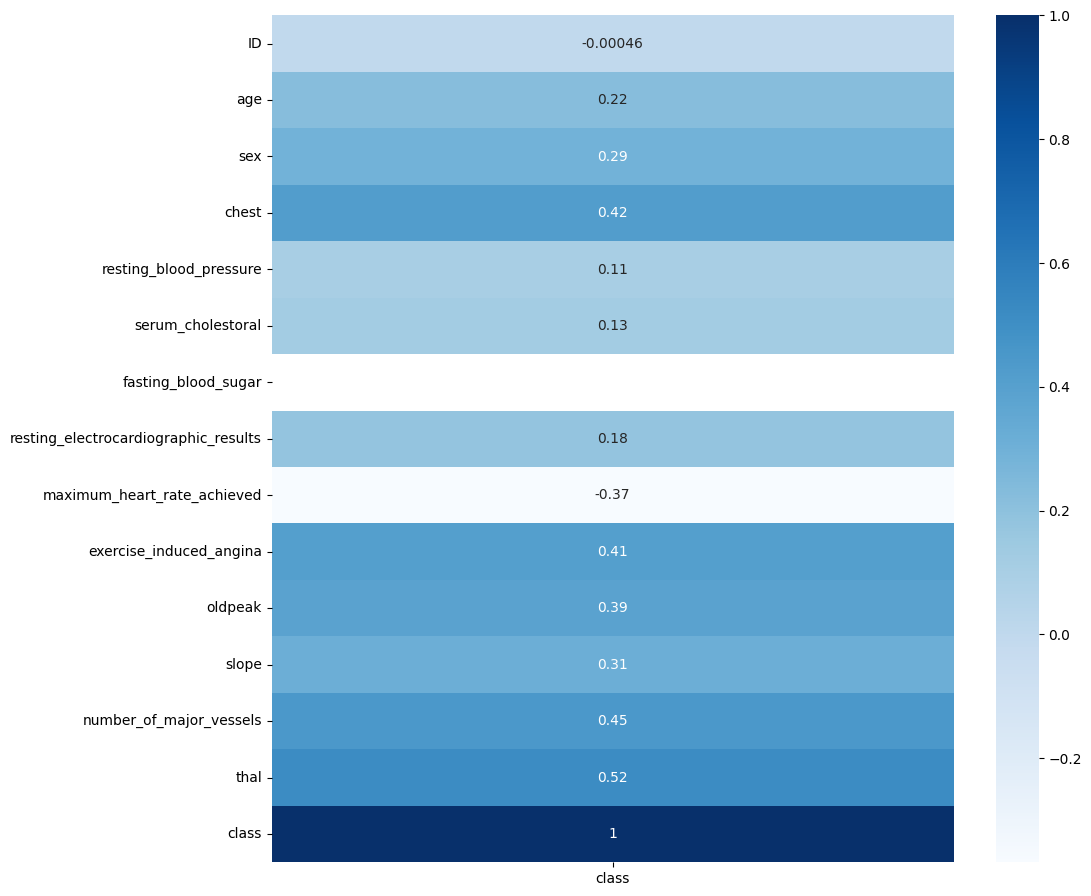

abs corr score: 
ID                                      0.000457
age                                     0.221550
sex                                     0.291573
chest                                   0.418440
resting_blood_pressure                  0.106104
serum_cholestoral                       0.125081
fasting_blood_sugar                          NaN
resting_electrocardiographic_results    0.179604
maximum_heart_rate_achieved             0.368044
exercise_induced_angina                 0.411979
oldpeak                                 0.387643
slope                                   0.311701
number_of_major_vessels                 0.448422
thal                                    0.515799
Name: class, dtype: float64


mean 0.2912611106191918


feature selection result: 
sex                            0.291573
chest                          0.418440
maximum_heart_rate_achieved    0.368044
exercise_induced_angina        0.411979
oldpeak                        0.387643
slope         

In [22]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['class'][0:-1]))
cor['output'] = cor['class'][0:-1]
margin = abs(cor['class'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['class'][0:-1])[abs(cor['class']) > margin]
print(fs)

Train-Test Split

In [23]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [24]:
from sklearn import model_selection

ModuleNotFoundError: No module named 'sklearn'

In [27]:
# Define input features and target variable
X = df.drop(columns=['class'])
y = df['class']

# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ModuleNotFoundError: No module named 'sklearn'

In [28]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define model parameters for hyperparameter tuning
model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    }
    }
scores = []

ModuleNotFoundError: No module named 'sklearn'

In [29]:
# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'sklearn'

In [30]:
# Perform hyperparameter tuning for each model
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

NameError: name 'model_params' is not defined

In [31]:
# Store the results in a DataFrame
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

NameError: name 'scores' is not defined

Modeling
1. Logistic Regression

In [32]:
# Select the best parameters for Logistic Regression
best.best_params[0]

NameError: name 'best' is not defined

In [33]:
# Create a Logistic Regression model with the best parameters and fit it to the training data
model = LogisticRegression(solver = 'saga',
                           penalty = 'l1',
                           multi_class = 'auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

NameError: name 'LogisticRegression' is not defined

Evaluation

In [34]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

ModuleNotFoundError: No module named 'sklearn'

In [35]:
# Plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

NameError: name 'confusion_matrix' is not defined

In [36]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Display the classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

ModuleNotFoundError: No module named 'sklearn'

2. Decision Tree

In [37]:
# Select the best parameters for Decision Tree
best.best_params[1]

NameError: name 'best' is not defined

In [38]:
# Create a Decision Tree model with the best parameters and fit it to the training data
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 5,
                               max_features = 'log2',
                               splitter = 'best')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

NameError: name 'DecisionTreeClassifier' is not defined

Evaluation

In [39]:
# Display the confusion matrix for Decision Tree
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

ModuleNotFoundError: No module named 'sklearn'

In [40]:
# Plot the confusion matrix for Decision Tree
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

NameError: name 'confusion_matrix' is not defined

In [41]:
# Display the classification report for Decision Tree
from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

ModuleNotFoundError: No module named 'sklearn'

3. Support Vector Machine (SVM)

In [ ]:
# Select the best parameters for SVM
best.best_params[2]

In [ ]:
# Create an SVM model with the best parameters and fit it to the training data
model = SVC(gamma = 'auto', kernel = 'rbf')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

Evaluation

In [ ]:
# Display the confusion matrix for SVM
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

In [ ]:
# Plot the confusion matrix for SVM
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [ ]:
# Display the classification report for SVM
from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))